In [25]:
%matplotlib widget                      
import matplotlib.pyplot as plt 
import numpy as np
import ipywidgets as widgets
# stb.


plt.ion()

<h3 style="background :Red; padding: 1%!important;"> 1. Házi feladat. (2 pont)</h3>
    
Írj egy függvényt, ami meghatározza két szám legnagyobb közös osztóját! A függvény segítségével írasd ki az alábbi számpárok legnagyobb közös osztóját!
$$ (5,9) \quad (18,42) \quad (256,36) \quad (98,21) $$

In [26]:
def lnko(a, b):
    while (b != 0):
        m = a % b
        a = b
        b = m
    return a


print(lnko(5, 9), lnko(18, 42), lnko(256, 36), lnko(98, 21))

1 6 4 7


<h3 style="background :Red; padding: 1%!important;"> 2. Házi feladat. (2 pont)</h3> 

Írj egy függvényt, ami visszatérít egy listát, ami az első $m$ prímszámot tartalmazza! A függvény segítségével írasd ki az első 20 prímszámot!

In [34]:
def isPrime(m):
    if (m < 2):
        return False
    elif(m % 2 == 0):
        return (m == 2)
    elif(m < 6):
        return True
    else:
        if((m + 1) % 6 != 0) and ((m - 1) % 6 != 0):
            return False
        else:
            for i in range(2, round(np.sqrt(m) + 1)):
                if (m % i == 0):
                    return False
    return True

def primes(m):
    number = 2
    list = []
    while(len(list) != m):
        if (isPrime(number)):
            list.append(number)
        number = number + 1
    return list

print(primes(20))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71]


<h3 style="background :Red; padding: 1%!important;">3. Házi feladat. (3 pont) </h3> 

Legyen
$
A =\begin{pmatrix}
   1 & 1 \\
   1 & 0
\end{pmatrix},
$ valamint $x_n$ és $y_n$ az $A^n$ mátrix bal felső, illetve jobb felső eleme. 

a) A ```numpy``` csomagot felhasználva számold ki és írasd ki az $x_1, x_2, \dots, x_{20}$  értékeket!  
    
b) Ábrázold az $(x_1,y_1), (x_2,y_2), \dots, (x_{20},y_{20})$ koordinátájú pontokat a ```matplotlib``` csomag segítségével!
    

[1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946]


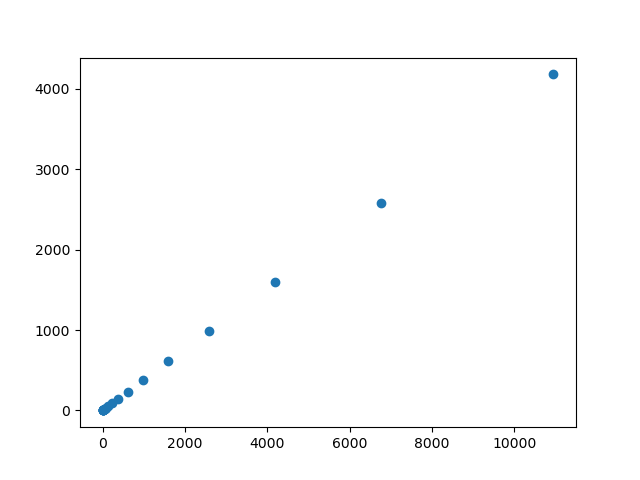

In [35]:
A = [[1, 1], [1, 0]]
hatvanyozottA = A
x = [hatvanyozottA[0][0]]
y = [hatvanyozottA[1][1]]
for i in range(1, 20):
    hatvanyozottA = np.matmul(hatvanyozottA, A)
    x.append(hatvanyozottA[0][0])
    y.append(hatvanyozottA[1][1])

print(x)
fig1, ax1 = plt.subplots()
ax1.plot(x, y, "o")

<h3 style="background :Red; padding: 1%!important;">4. Házi feladat. (3 pont)</h3>

Készíts egy ábrát, amelyre a ```plot``` függvény segítségével $n+1$ darab piros (körvonalú) négyzetet rajzolsz ki úgy, hogy azok oldalai párhuzamosak legyenek az $O_x$ és $O_y$ tengelyekkel, bal alsó sarkuk legyen az origó és amelyek oldalai rendre $2^0, 2^1, \dots, 2^n$ hosszúságúak! Ugyanerre az ábrára a ```plot``` függvény egyszeri meghívásával rajzolj egy-egy kék pontot a négyzetek jobb felső sarkaira! Az $n$ értéke interaktívan legyen változtatható egyesével a $0$ és $5$  értékek között, és alapértelmezetten legyen $3$.

interactive(children=(IntSlider(value=3, description='n', max=5), Output()), _dom_classes=('widget-interact',)…

<function __main__.feladat4(n=3)>

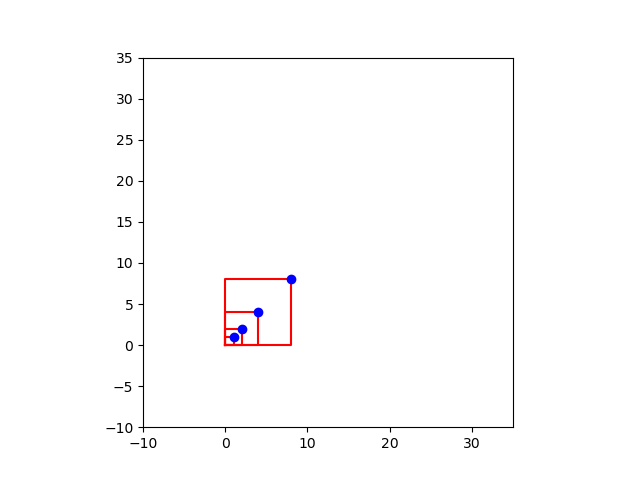

In [37]:
fig2, ax2 = plt.subplots()
def feladat4(n = 3):
    x = []
    ax2.cla()
    ax2.set_aspect('equal')
    ax2.set_xlim(-10, 35)
    ax2.set_ylim(-10, 35)
    for i in range(n + 1):
        if len(x) == 0:
            x.append(1)
        else:
            x.append(x[i-1] * 2)
        ax2.plot([0, x[i], x[i], 0, 0], [0, 0, x[i], x[i], 0], '-r')
    
    ax2.plot(x, x, 'bo')
widgets.interact(feladat4, n = (0,5))

<h3 style="background :Red; padding: 1%!important;">5. Házi feladat. (+2 pont)</h3>

Egy $(0,0)$ pozícióból $\varphi$ szög alatt $v_0$ kezdősebességgel elhajított test helyzetének koordinátáit a $t$ időpillanatban az

$$
\begin{cases}
x(t)=v_0\cos(\varphi)t\\
y(t)=v_0\sin(\varphi)t-5t^2
\end{cases}
$$

rendszer adja. Készíts egy animációt, amelyen megjelenik a $t\in[0,4]$ időintervallumnak megfelelő pálya, illetve ahol egy golyó az idő szerinti animációnak megfelelően végigfut az adott pályán! Az ismeretlen paraméterek interaktívan legyenek állíthatóak!

interactive(children=(IntSlider(value=45, description='phi', max=90), IntSlider(value=10, description='v0', ma…

<function __main__.feladat5(phi, v0, t)>

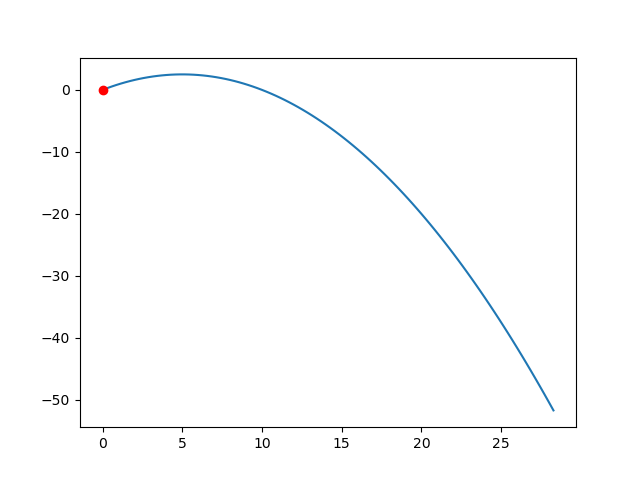

In [39]:
fig3, ax3 = plt.subplots()
tt = np.linspace(0, 4, 100)
def feladat5(phi, v0, t):
    t = t/10
    ax3.cla()
    x = v0 * np.cos(np.radians(phi)) * tt
    y = v0 * np.sin(np.radians(phi)) * tt - 5 * tt**2
    ax3.plot(x, y)
    ballX = v0 * np.cos(np.radians(phi)) * t
    ballY = v0 * np.sin(np.radians(phi)) * t - 5 * t**2
    ax3.plot(ballX, ballY, 'ro')
widgets.interact(feladat5, phi=(0, 90), v0=(0, 20), t=widgets.Play(0, 0, 40, interval=100))

